# Lab 4
## By Madeleine Cummings

## Q0 

### 1. What makes a model “linear”? “Linear” in what?

A model is linear when its line of best fit or prediction model is linear meaning that it follows the y = mx + b structure.  If there is any additional factors being taken into account say X, it gets added on like y = mx + aX + b.  There are no multiplicities on the model.  It is linear in the relationship between the independent variables and the output variable. 

### 2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.) There’s further explanation at the end of this document, if needed.

The coefficient refers to how much the dummy/one-hot-encoded variable will effect the model.  Because it is either 1 or 0, you want to see how much it will change the model by if it is true, and if it will only change it a little you would choose a smaller coefficient and if it is a bigger difference you would choose a larger coefficient.  So by looking at the amount of the coefficient you can see how important that variable is to the model and how much it can change the model by. 

### 3. Can linear regression be used for classification? Explain why, or why not.

In theory it could be used for classification but not well.  For say a one hot encoded variable the options are 1 or 0, a linear regression model would provide us with a multitude of outputs not just one or zero so we would have to create a manual cutoff to where we can classify it as a one or zero.  For example if we got an output of 0.4  we could make that 0 and if we got 0.6 we could make that 1 if we made the cutoff at 0.5. However, this would not really be a good way of going about it because you technically cannot have anything in between each category, instead it either is or is not apart of that category.

### 4. If you have a high accuracy on training but low on testing, what might be the problem? It’s also possible you’ll see a pattern in the residuals.

If the model works really well on training but bad on testing then the model is likely overfit.  This means that it will work great on the training model as it specifically is fitted to that but bad on any other data as it does not take into account the randomness that comes from other data.  While it would be nice if our real life data perfect matched our training data, that is  not the case meaning an overfitted model will not preform well when tested. 

### 5. Review this page: Non-Linear with Linear What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable y and your features/control/response/independent variables x?

One of the ways you can handle it is by using polynomial regression.  By using higher degrees you can create curves in your model that will better reflect linearity limitation of the model.  

Another way that you can handle it is with decision tree regression.  By not having an equation that represents the cline and instead connecting many smaller linear lines, there can be many lines of best fit that all work together to create a more accurate line of best fit.  

### 6. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

The intercept refers to what our dependent variable (y) will be when every independent variable is 0.  

The slope coefficient refers to how much the dependent variable will change by for every one unit change in that independent variable x. 

The coefficient for a dummy/one hot encoded variable represents how much the dependent variable (y) changes by the dummy variable is present (meaning it is a 1).  






 ## Q2

In [2]:
import pandas as pd
from pandas import read_csv, Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import statsmodels
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from pandas import read_csv

In [4]:

rent = pd.read_csv("https://raw.githubusercontent.com/DS3001/linearRegression/refs/heads/main/data/Q1_clean.csv")

rent.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


### 1. Compute the average prices and scores by Neighborhood ; which borough is the most expensive on average? Create a kernel density plot of price and log price, grouping by Neighborhood .

In [5]:
the_avg = rent.groupby('Neighbourhood ')[['Price', 'Review Scores Rating']].mean()

print(the_avg)


                     Price  Review Scores Rating
Neighbourhood                                   
Bronx            75.276498             91.654378
Brooklyn        127.747378             92.363497
Manhattan       183.664286             91.801496
Queens           96.857233             91.549057
Staten Island   146.166667             90.843750


Manhattan is the most expensive neighborhood on average. 

<Axes: xlabel='Price', ylabel='Density'>

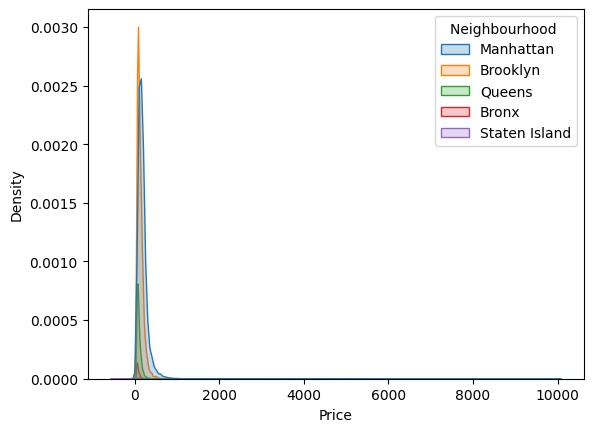

In [6]:
# Showing the individual KDE plot of price 
sns.kdeplot(rent, x = "Price", hue="Neighbourhood ", fill=True)



<Axes: xlabel='Log_Price', ylabel='Density'>

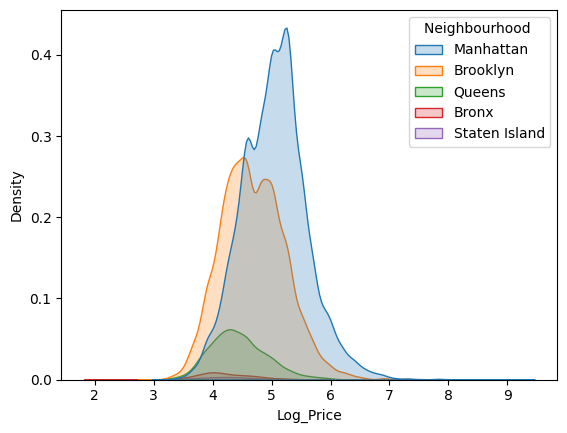

In [7]:
# Showing just the log price KDE Plot
rent['Log_Price'] = np.log(rent['Price'])
sns.kdeplot(rent, x = "Log_Price", hue="Neighbourhood ", fill=True)


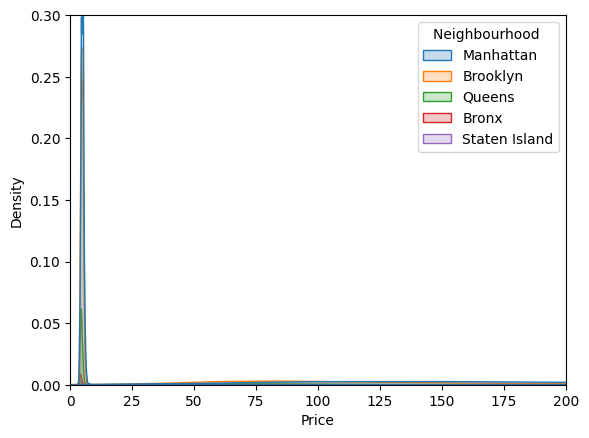

In [8]:
# Showing the KDE plot of log price and price together 

sns.kdeplot(rent, x = "Price", hue="Neighbourhood ", fill=True)
sns.kdeplot(rent, x = "Log_Price", hue="Neighbourhood ", fill=True)


# I made the axis's smaller so that way we can better 
# see that both log price and price are plotted
plt.xlim(0, 200)
plt.ylim(0, 0.3)
plt.show()

### 2. Regress price on Neighborhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [9]:
# One Hot encoding everything

rents = rent
rents['Manhattan'] = rents['Neighbourhood '].apply(lambda x: 1 if x == "Manhattan"  else 0)
rents['Brooklyn'] = rents['Neighbourhood '].apply(lambda x: 1 if x == "Brooklyn"  else 0)
rents['Queens'] = rents['Neighbourhood '].apply(lambda x: 1 if x == "Queens"  else 0)
rents['Bronx'] = rents['Neighbourhood '].apply(lambda x: 1 if x == "Bronx"  else 0)
rents['Staten Island'] = rents['Neighbourhood '].apply(lambda x: 1 if x == "Staten Island"  else 0)
# have to not include one of the dummy variables with intercept 

rents.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type,Log_Price,Manhattan,Brooklyn,Queens,Bronx,Staten Island
0,549,96.0,Manhattan,Apartment,Private room,6.308098,1,0,0,0,0
1,149,100.0,Brooklyn,Apartment,Entire home/apt,5.003946,0,1,0,0,0
2,250,100.0,Manhattan,Apartment,Entire home/apt,5.521461,1,0,0,0,0
3,90,94.0,Brooklyn,Apartment,Private room,4.499810,0,1,0,0,0
4,270,90.0,Manhattan,Apartment,Entire home/apt,5.598422,1,0,0,0,0


In [10]:
# Finding the Coefficients 

X = rents[["Manhattan", "Brooklyn", "Queens", "Bronx"]]
y = rents["Price"]

model = LinearRegression(fit_intercept=False) 
model.fit(X, y)
coefficients = model.coef_

coefficients

array([183.66428632, 127.74737834,  96.8572327 ,  75.2764977 ])

In [11]:
print(the_avg)

                     Price  Review Scores Rating
Neighbourhood                                   
Bronx            75.276498             91.654378
Brooklyn        127.747378             92.363497
Manhattan       183.664286             91.801496
Queens           96.857233             91.549057
Staten Island   146.166667             90.843750


The coefficients given to us by the model, seem to be almost the exact same as the average price of each neighborhood.  So the coefficients in a regression of continous variable on one categorical variable just represents the average of the continous variable in that category. 

### 3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

With the intercept we can include all of our dummy variables in our model while without it we had to drop one. 

In [12]:
rents1 = rent
rents1['Manhattan'] = rents1['Neighbourhood '].apply(lambda x: 1 if x == "Manhattan"  else 0)
rents1['Brooklyn'] = rents1['Neighbourhood '].apply(lambda x: 1 if x == "Brooklyn"  else 0)
rents1['Queens'] = rents1['Neighbourhood '].apply(lambda x: 1 if x == "Queens"  else 0)
rents1['Bronx'] = rents1['Neighbourhood '].apply(lambda x: 1 if x == "Bronx"  else 0)
rents1['Staten Island'] = rents1['Neighbourhood '].apply(lambda x: 1 if x == "Staten Island"  else 0)

rents1.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type,Log_Price,Manhattan,Brooklyn,Queens,Bronx,Staten Island
0,549,96.0,Manhattan,Apartment,Private room,6.308098,1,0,0,0,0
1,149,100.0,Brooklyn,Apartment,Entire home/apt,5.003946,0,1,0,0,0
2,250,100.0,Manhattan,Apartment,Entire home/apt,5.521461,1,0,0,0,0
3,90,94.0,Brooklyn,Apartment,Private room,4.499810,0,1,0,0,0
4,270,90.0,Manhattan,Apartment,Entire home/apt,5.598422,1,0,0,0,0


In [13]:
X = rents[["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]]
y = rents["Price"]

model = LinearRegression(fit_intercept=True) 
model.fit(X, y)
coefficients = model.coef_
intercept = model.intercept_

print(intercept)
print(coefficients)

125.9424123463574
[ 57.72187398   1.804966   -29.08517964 -50.66591465  20.22425432]


#### 3. Written answers
With the intercept we can include all of our dummy variables in our model while without it we had to drop one. The intercept is 125.94, the coefficients represent how different the average price for that neighborhood is compared to the intercept.  For example, Manhattan has a coefficient of 57 because its average price is 57 + 125.  You can get the previous coefficients by doing the intercept + the current coefficients.

### 4. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighborhood . What is the R^2 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [14]:
y = rents["Price"]
X = rents[["Review Scores Rating", "Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
# rmse = np.sqrt((np.sum((y_test - y_pred)**2))/)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2)
print(rmse)
coefficients = model.coef_
print (coefficients)


0.045925883817350965
140.91821103729345
[  1.21185178  66.88899912  11.03141665 -20.32598065 -40.52455366
 -17.06988147]


In [15]:
# finding most expensive property type

the_avg1 = rent.groupby('Property Type')[['Price']].mean()

print(the_avg1)

                      Price
Property Type              
Apartment        153.928470
Bed & Breakfast  103.095588
Boat             153.333333
Bungalow         143.666667
Cabin            165.000000
Camper/RV         66.666667
Castle           150.000000
Chalet            99.000000
Condominium      241.229167
Dorm              65.545455
House            147.142399
Hut               50.000000
Lighthouse        39.000000
Loft             203.571912
Other            178.928571
Townhouse        214.253012
Treehouse        167.666667
Villa            154.000000


The R^2 is 0.045925883817350965

The RMSE is 140.91821103729345

The coefficient on Review Scores Rating is 1.21185178.

The most expensive property you can rent is a condominium. 

### 5. Run a regression of Price on Review Scores Rating and Neighborhood and Property Type. What is the R^2 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [16]:
prop_type = pd.get_dummies(rents['Property Type'], drop_first=True)
rents2 = pd.concat([rents, prop_type], axis=1)

rents2.head()


,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type,Log_Price,Manhattan,Brooklyn,Queens,Bronx,...,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Townhouse,Treehouse,Villa
0,549,96.0,Manhattan,Apartment,Private room,6.308098,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,149,100.0,Brooklyn,Apartment,Entire home/apt,5.003946,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
2,250,100.0,Manhattan,Apartment,Entire home/apt,5.521461,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,90,94.0,Brooklyn,Apartment,Private room,4.499810,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
4,270,90.0,Manhattan,Apartment,Entire home/apt,5.598422,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [17]:

y = rents2["Price"]
X = rents2[["Review Scores Rating", "Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island", 'Bed & Breakfast', 'Boat', 'Bungalow', 'Cabin', 'Camper/RV', 'Castle', 'Chalet', 
     'Condominium', 'Dorm', 'House', 'Hut', 'Lighthouse', 'Loft', 'Other', 
     'Townhouse', 'Treehouse']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
# rmse = np.sqrt((np.sum((y_test - y_pred)**2))/)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2)
print(rmse)
coefficients = model.coef_
print (coefficients)

0.05422796542790753
140.30375631718576
[   1.20115689   76.35422266   14.9777333   -17.74036742  -44.6494477
  -28.94214085  -28.72582637   46.98204165   83.88435542   12.30402251
  -13.88946175  -41.81948976  -30.24184351   61.89864805  -42.30029456
   34.68701233 -134.61254844  -91.4430004    69.88477543   49.2299056
   44.10178737   10.31950371]


The coefficient for Review Scores Rating is 1.20115689.  The most expensive property to rent is a condiminium. 

### 6. What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multiple linear regression works.

If it changes then that means that the property type is effecting the price.  By introducing additional factors into the model, some of what we thoguht was explained by Review Scores Rating, might actually be explained by property type causing it to change. 

## Question 2

### 1: Load cars_hw.csv. These data were really dirty, and I’ve already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly skewed variables that require a log or arcsinh transformation) Note this is different than normalizing: there is a text below that explains further. Clean the data however you think is most appropriate.

In [18]:
cars = pd.read_csv('/workspaces/DS-3021/data/cars_hw.csv')

cars.head(10)

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000
5,6,Hyundai,2016,red,hatchback,52261,1st,5,petrol,5-Speed,Manual,604000
6,7,Honda,2012,grey,hatchback,28108,2nd,5,petrol,5-Speed,Manual,316000
7,8,Tata,2019,grey,suv,92603,1st,5,diesel,6-Speed,Automatic,1419000
8,9,Hyundai,2021,blue,hatchback,16304,1st,5,petrol,5-Speed,Manual,710000
9,10,Renault,2019,bronze,hatchback,26350,2nd,5,petrol,5-Speed,Manual,392000


In [19]:

cars['Seating_Capacity1'] = np.log1p(cars['Seating_Capacity'])
cars['Price1'] = np.log1p(cars['Price'])
cars.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price,Seating_Capacity1,Price1
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000,1.791759,13.395441
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000,1.791759,13.432786
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000,1.791759,13.583580
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000,1.791759,12.933624
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000,1.791759,13.151924


### 2: Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

In [20]:
cars["Price"].describe()

count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

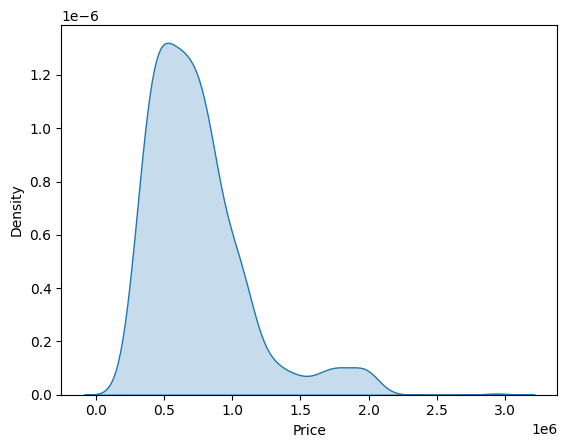

In [21]:
sns.kdeplot(cars, x = "Price", fill=True)

In [22]:
cars.groupby('Make')[['Price']].describe()


Price                                                    \
               count          mean           std        min        25%   
Make                                                                     
Chevrolet        6.0  4.535000e+05  2.466064e+05   267000.0   288500.0   
Datsun           3.0  2.896667e+05  1.050397e+04   279000.0   284500.0   
Ford            52.0  7.211731e+05  1.409277e+05   290000.0   635000.0   
Honda           73.0  7.989726e+05  2.665091e+05   316000.0   581000.0   
Hyundai        305.0  6.918918e+05  2.791597e+05   248000.0   485000.0   
Jeep             4.0  1.499500e+06  1.525134e+05  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  1.190567e+05  1369000.0  1579000.0   
MG Motors       35.0  1.869457e+06  1.216611e+05  1589000.0  1786500.0   
Mahindra        18.0  1.100167e+06  1.755493e+05   796000.0  1037000.0   
Maruti Suzuki  293.0  5.887850e+05  2.160199e+05   237000.0   411000.0   
Nissan           4.0  8.842500e+05  2.895599e+05   475000.0   782500.0   
Renault         68.0  6.625735e+05  2.148273e+05   287000.0   475000.0   
Skoda            5.0  1.136000e+06  1.070175e+06   436000.0   466000.0   
Tata            23.0  1.055217e+06  5.578305e+05   188000.0   779500.0   
Toyota          50.0  8.003400e+05  2.466900e+05   368000.0   526250.0   
Volkswagen      29.0  6.058276e+05  1.198312e+05   402000.0   542000.0   

                                                
                     50%        75%        max  
Make                                            
Chevrolet       345500.0   537500.0   892000.0  
Datsun          290000.0   295000.0   300000.0  
Ford            707500.0   787000.0  1066000.0  
Honda           785000.0   915000.0  1537000.0  
Hyundai         638000.0   837000.0  1742000.0  
Jeep           1529500.0  1581500.0  1649000.0  
Kia            1628500.0  1705750.0  1741000.0  
MG Motors      1848000.0  1978000.0  2019000.0  
Mahindra       1094500.0  1157000.0  1465000.0  
Maruti Suzuki   527000.0   764000.0  1163000.0  
Nissan          978000.0  1079750.0  1106000.0  
Renault         644000.0   801000.0  1164000.0  
Skoda           538000.0  1299000.0  2941000.0  
Tata            869000.0  1552000.0  2100000.0  
Toyota          894000.0  1023000.0  1092000.0  
Volkswagen      607000.0   699000.0   790000.0

<Axes: xlabel='Price', ylabel='Density'>

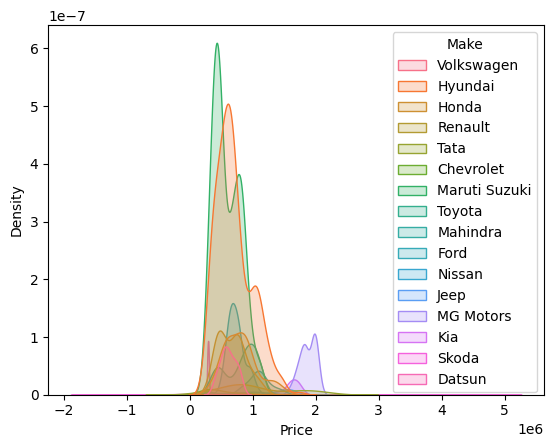

In [23]:
sns.kdeplot(cars, x = "Price", hue= "Make", fill=True)

MG Moters, kia and jeep tend to be some of the most expensive.  Generally prices are at around 5 * 10^5.  However they generally range from 1000 to 2*10^6

### 3. Split the data into an 80% training set and a 20% testing set.

In [34]:
y = cars["Price"]
X = cars.drop(columns=['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4: Make a model where you regress price on the numeric variables alone; what is the R^2 and RMSE on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use pd.get_dummies(); be careful of the dummy variable trap); what is the R^2 and RMSE on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the R^2 and RMSE on the test set? Does the joint model perform better or worse, and by home much?

In [43]:
X_train_n = X_train[['Seating_Capacity1', 'Mileage_Run','Make_Year']]
X_test_n = X_test[['Seating_Capacity1', 'Mileage_Run','Make_Year']]

model_n = LinearRegression()
model_n.fit(X_train_n, y_train)

y_pred = model_n.predict(X_test_n)

y_t_pred = model_n.predict(X_train_n)

r2 = r2_score(y_train, y_t_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_t_pred))
print("Train Data set R^2 first, RMSE second")
print(r2)
print(rmse)


r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test Data set R^2 first, RMSE second")
print(r2)
print(rmse)



Train Data set R^2 first, RMSE second
0.31494595514881785
309225.2455741484
Test Data set R^2 first, RMSE second
0.2934121573877525
284679.52788596344


In [50]:
X_categorical = pd.get_dummies(cars[['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission_Type']], drop_first=True)
X_train_c, X_test_c, y_train, y_test = train_test_split(X_categorical, y, test_size=0.2, random_state=42)

model_n = LinearRegression()
model_n.fit(X_train_c, y_train)

y_pred = model_n.predict(X_test_c)

y_t_pred = model_n.predict(X_train_c)




r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test Data set R^2 first, RMSE second")
print(r2)
print(rmse)

Test Data set R^2 first, RMSE second
0.6639190844540186
196333.80451741634


The second model performs better on the test set (the one with categorical data), it has a smaller RMSE. 

In [53]:
cars_n = cars[['Seating_Capacity1', 'Mileage_Run', 'Make_Year']].reset_index(drop=True)
combinedcars = pd.concat([X_categorical, cars_n], axis=1)
X_train, X_test, y_train, y_test = train_test_split(combinedcars, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test Data set R^2 first, RMSE second")
print(r2)
print(rmse)


Test Data set R^2 first, RMSE second
0.7892009639211461
155491.79133188128


The joint model performs significantly better.  The RMSE went from 280000 to 190000 to 155000.  

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


degrees = [1, 10, 17, 20, 30]
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_p = poly.fit_transform(X_train[['Seating_Capacity1', 'Mileage_Run', 'Make_Year']])
    X_test_p = poly.transform(X_test[['Seating_Capacity1', 'Mileage_Run', 'Make_Year']])

    model = LinearRegression()
    model.fit(X_train_p, y_train)

    y_pred_train = model.predict(X_train_p)
    y_pred_test = model.predict(X_test_p)


    r2_test.append(r2_score(y_test, y_pred_test))

    rmse_test.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))


print(r2_test)
print(rmse_test)


[0.2934121573877231, 0.123708708586736, 0.07641409386455777, -0.18046758812440067, -0.025763571554988207]
[np.float64(284679.5278859694), np.float64(317027.8419224582), np.float64(325470.6303389924), np.float64(367959.64411376556), np.float64(343002.1105736865)]


As the degree expands, R^2 goes down while RMSE goes up.  R^2 becomes negative around 19.  My best models RMSE was 280,000 and R^2 of 0.2934 which was worse than my best model in 4 which had an RMSE of 150,000 and an R^2 of 0.78.

### 6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

Text(0, 0.5, 'Predicted Values')

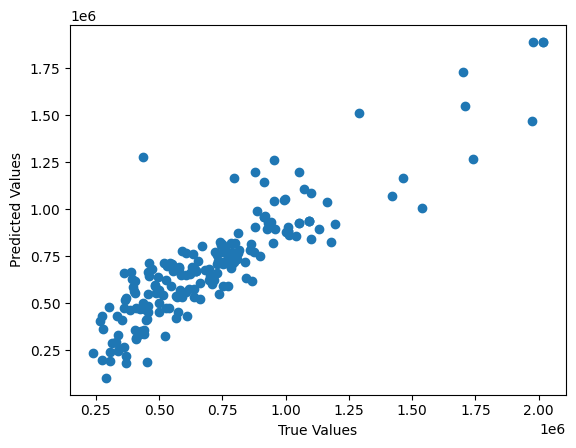

In [64]:
plt.scatter(y_test, y_pred)  # Scatter plot of true vs predicted values

plt.xlabel('True Values')
plt.ylabel('Predicted Values')

Generally the values do line up on the diagonal.  They have a clear positve correlation.  

In [66]:
residuals = y_test - y_pred
print(residuals)

199      3045.701719
541   -182168.331045
174    -47777.695765
468    -61776.000543
66     475419.120810
           ...      
824   -161042.177851
881     40486.750256
523    -48652.975379
689    251418.186895
970    -52039.710957
Name: Price, Length: 196, dtype: float64


<Axes: xlabel='Price', ylabel='Density'>

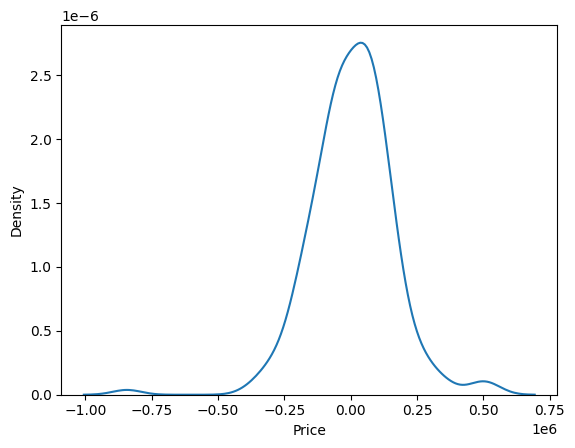

In [67]:
sns.kdeplot(residuals)

The residuals are bell shaped around zero.  This means that the model is acting fairly accurately.  However on both sides it seems that there are small amounts of larger error.  Perhaps this was from outliers being left in the data.  If so those could be taken out to better create the model.  However overall, the model seems normally distributed.  

## Question 3

### 1. Find a dataset on a topic you’re interested in. Some easy options are data.gov, kaggle.com, and data.world.


In [70]:

coffee = pd.read_csv("/workspaces/DS-3021/06_ML_Concepts_II_KNN/coffee_shop_revenue.csv")

coffee.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


### 2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.

In [72]:
coffee.groupby('Number_of_Employees')[['Daily_Revenue']].mean()

,Daily_Revenue
Number_of_Employees,
2,1850.392821
3,1894.754192
4,2037.266897
5,1941.952549
6,1975.301267
7,1950.401282
8,1842.192343
9,1781.255724
10,1942.847746


In [73]:
coffee.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


I am choosing a target variable of Daily Revanue, and using operating hours, number of employees, and marketing per day as predictors. 

### 3. Split the sample into an ~80% training set and a ~20% test set.

In [79]:
y = coffee["Daily_Revenue"]
X = coffee[['Marketing_Spend_Per_Day', 'Number_of_Employees', 'Operating_Hours_Per_Day']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the RMSE on the test set.

In [82]:
## using all features
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(rmse)

935.6627864885508


In [86]:
## Using just 2 features 

model = LinearRegression()

X_train1 = X_train[['Marketing_Spend_Per_Day', 'Number_of_Employees']]
X_test1 = X_test[['Marketing_Spend_Per_Day', 'Number_of_Employees']]


model.fit(X_train1, y_train)

y_pred = model.predict(X_test1)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(rmse)

934.3977792915706


In [85]:
## Using just 2 features 

model = LinearRegression()

X_train1 = X_train[['Marketing_Spend_Per_Day', 'Operating_Hours_Per_Day']]
X_test1 = X_test[['Marketing_Spend_Per_Day', 'Operating_Hours_Per_Day']]


model.fit(X_train1, y_train)

y_pred = model.predict(X_test1)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(rmse)

934.2743322875918


In [84]:
## Using just 2 features 

model = LinearRegression()

X_train1 = X_train[['Number_of_Employees', 'Operating_Hours_Per_Day']]
X_test1 = X_test[['Number_of_Employees', 'Operating_Hours_Per_Day']]


model.fit(X_train1, y_train)

y_pred = model.predict(X_test1)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(rmse)

969.0615657554176


### 5. Which model performed the best, and why?

The best model used only Marketing Spend per day and Operating Hours per day.  It seems that those 2 were the most highly correlated variables out of the 3 that I chose to look at.  However, I believe that Marketing spend per day was the best indicator.  Whenever it was used the model got a lower very simular RMSE.  The one model that did not use it got a higher RMSE by more than the other models had differed by. It seems that Number of employees was not the best indication of daily revanue as it produced larger RMSE values when it was included. This may be because employee numbers dont nessesarily mean more revenue.  They are an added labor cost but sometimes help to provide better customer service hence causing more customers.  It is not a good indicator for revanue.  

### 6. What did you learn?

I learned that sometimes using more factors doesnt nessesarily lead to a better working model.  Some factors/features are much more useful in predicting target varaibles than others.  AS well it helps to do initial exploration of the dataset so that way you know where you are aiming to go. 